# <div align='center'> **Light GBM**

Microsoft tarafından geliştirilmiş, makine öğrenimi yarışmalarında iyi sonuçlar alan bir başka ağaç tabanlı boosting yöntemidir. En önemli özellikleri olarak :

# 1. Light GBM ile Sınıflandırma
Modelleri hızlı eğitmesi
Düşük hafıza kullanımı
Yüksek doğruluk
GPU ve Paralel işlemci kullanabilme
Büyük verilerle çalışabilme öne çıkmaktadır.
Diğer boosting yöntemlerinde ağaç seviye seviye yatay olarak büyürken, Light GBM'de ağaç dikey olarak büyümekte yani büyümek için dallardan birini seçmekte ve bundan sonra bu dal üzerinden gitmektedir. Bu dal tamamlandıktan sonra üst seviyelere geri dönerek diğer dallardan devam etmektedir.

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [11]:
dfwine = pd.read_csv('data/wine.csv')
dfwine.type = dfwine.type.map({'white':1, 'red':0}) 
dfwine.head(1)

,Unnamed: 0,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_range
0,0,1,7.0,0.27,0.36,17.2,0.045,45.0,170.0,1.001,3.0,0.45,8.8,1


In [19]:
X = dfwine.drop('quality_range', axis=1)
y = dfwine.quality_range


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

In [20]:
#!pip install lightgbm 

In [21]:
import lightgbm as lgb

In [22]:
#Eğitim verilerini modelde eğitmeden önce LightGBM veri formatına çevirmemiz gerekiyor.

y_train = lgb.Dataset(X_train, label=y_train)

In [23]:
#Modelimizde kullanacağımız parametreleri belirleyelim.

params = {'boosting_type' : 'gbdt',
          'objective' : 'binary',
          'metric' : 'binary_logloss',
          'sub_feature' : 0.5,
          'num_leaves' :  10,
          'min_data' : 50,
          'max_depth' : 10}

In [24]:
#Modelin egitimi

lgb_model = lgb.train(params, y_train, num_boost_round=100)

In [25]:
#predict fonksiyonu ile test kümesindeki verilerle tahmin yapabiliriz.

y_tahmin=lgb_model.predict(X_test)
y_tahmin[:10]

array([0.87850276, 0.48804065, 0.64531489, 0.68192614, 0.62478472,
       0.07823955, 0.31320693, 0.35185877, 0.78286318, 0.70354059])

In [26]:
#predict fonksiyonu önceki makine öğrenme algoritmalarından farklı olarak tahmin değeri yerine tahmin ihtimalini vermektedir. Yani predict_proba ile aldığımız sonucu döndürmektedir. Bir eşik seviyesi beirleyerek, bu değerleri tahminlere çevirelim.

y_tahmin = [0 if tahmin < 0.5 else 1 for tahmin in y_tahmin]
y_tahmin[:10]

[1, 0, 1, 1, 1, 0, 0, 0, 1, 1]

In [27]:
from sklearn.metrics import accuracy_score


dogruluk=accuracy_score(y_tahmin,y_test)
dogruluk


0.7747692307692308

# 2. Light GBM ile Regresyon

In [28]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [33]:
df_life_Exp = pd.read_csv('data/LifeExpectancy.csv')
df_life_Exp.head(1)

,Unnamed: 0,Year,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.25921,16.6,6.9,0.479,10.1


In [34]:
X = df_life_Exp.drop('Life_Expectancy', axis=1)
y = df_life_Exp.Life_Expectancy


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [35]:
#Veriyi eğitmeden önce Light GBM veri yapısına çeviriyoruz.

d_train = lgb.Dataset(X_train, label=y_train)

In [36]:
#Modeli eğitirken kullanacağımız parametreleri belirliyoruz.

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'verbose': 0}
n_estimators = 100

In [37]:
lgb_reg_model = lgb.train(params, d_train, num_boost_round = 100)

y_tahmin = lgb_reg_model.predict(X_test)

y_tahmin_train = lgb_reg_model.predict(X_train)


In [38]:
rmse = np.sqrt(mean_squared_error(y_test, y_tahmin))
print("RMSE: %f" % (rmse))

RMSE: 2.012667


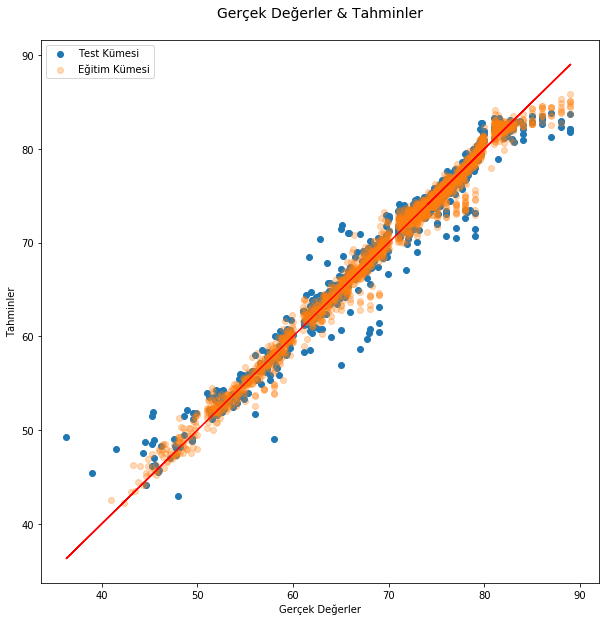

In [39]:
plt.figure(figsize=(10,10))
plt.title('Gerçek Değerler & Tahminler\n', size = 14)
ax1 = plt.scatter(y_test, y_tahmin)
ax2 = plt.scatter(y_train, y_tahmin_train,alpha=0.30)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('Test Kümesi', 'Eğitim Kümesi'))
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.show()

# 3. Light GBM ile Model Performansını Artırma

Light GBM ile oluşturduğumuz modelin performansını artırmak için hiperparametre ayarlaması yapmalıyız. Ayarlama yapabileceğimiz bazı parametreler şunlardır:

**max_depth** : Her bir ağaç için maksimum derinlik. 3-10 arası değerler uygundur. Overfitting olduğu takdirde bu değeri düşürmekle başlanabilir.

**min_data_in_leaf** : Her bir daldaki minimumu gözlem sayısı. Overfittingi önlemek için kullanılır.

**learning_rate : Modelin öğrenme oranı yani hatayı azaltma oranı. Küçük öğrenme oranları daha fazla iterasyon gerektirir. Genellikle 0.01 ile 0.2 arasında uygundur.

min_child_weight : Bir dalın minimum ağırlık değeri. Overfittingi kontrol etmek için kullanılır.

lambda_l1, lambda_l2 : Modelin regülarizasyon parametreleri.

bagging_fraction : Modeldeki verilerin bir ağacın eğitimi için kullanılacak oranı. 0 ila 1 arasında bir değerdir. Büyük değerler overfittinge yol açabilir.

feature_fraction : Her ağaç için kullanılacak değişken oranı. Bir regularizasyon sayılabilir. Büyük değerler fazla değişkenli modellerden dolayı overfittinge yol açabilir.

XGBoost'da olduğu gibi modelin boosting için kaç iterasyon yapacağını num_boost_round değişkeni ile belirleyebiliyor ve early_stopping_rounds parametresi sonlandırabiliyoruz.

Ayarlamak istediğimiz parametreleri bir listeye ekleyip, bir döngü ile en başarılı parametreleri bulabileceğimiz gibi sklearn kütüphanesindeki GridSearchCV ve RandomSearchCV fonksiyonlarını da kullanabiliriz.